In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
data=pd.read_csv('..\\..\\dataPreprocessing\\k_movie_2.csv')
data


,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


In [16]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


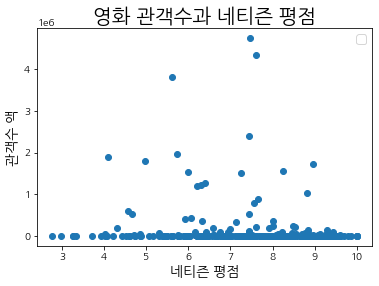

2.77
10.0


KruskalResult(statistic=nan, pvalue=nan)

In [17]:
#네티즌 평점에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
from scipy import stats
netizenViewer=data.dropna(subset=['VIEWNG_NMPR_CO', 'VIEWER_RT'])
fig, ax = plt.subplots()
ax.plot(netizenViewer['VIEWER_RT'],
        netizenViewer['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 관객수과 네티즌 평점', fontsize=20)
plt.xlabel('네티즌 평점', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

print(min(netizenViewer['VIEWER_RT']))
print(max(netizenViewer['VIEWER_RT']))

stats.kruskal(data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 1],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 2],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 3],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 4],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 5],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 6],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 7],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 8],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 9],
    data['VIEWNG_NMPR_CO'][data['VIEWER_RT'] == 10])


In [18]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(netizenViewer['VIEWNG_NMPR_CO']))
print(shapiro(netizenViewer['VIEWER_RT']))

#등분산성 - 등분산성을 따르지 않음
print(levene(netizenViewer['VIEWNG_NMPR_CO'], netizenViewer['VIEWER_RT'], center='median'))

ShapiroResult(statistic=0.24783772230148315, pvalue=1.4893745883518033e-35)
ShapiroResult(statistic=0.9578858613967896, pvalue=1.3033197632239535e-08)
LeveneResult(statistic=19.603796028545975, pvalue=1.1019608620981386e-05)


In [19]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음 : -0.01(0과 매우 가깝..) 선형 관계 있다고 볼 수 있을까..?
print(stats.spearmanr(netizenViewer['VIEWNG_NMPR_CO'],netizenViewer['VIEWER_RT']))

SpearmanrResult(correlation=-0.012208649010271981, pvalue=0.8179369820838368)


In [20]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ VIEWER_RT',data=netizenViewer).fit() ## 단순선형회귀모형 적합

In [21]:
fit.summary()
#R제곱과 수정 R제곱 수치가 0.012 ~ 0.009로 나타났다. : 1%정도의 자료만 설명 가능

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.264
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0396
Time:                        13:18:53   Log-Likelihood:                -5198.6
No. Observations:                 358   AIC:                         1.040e+04
Df Residuals:                     356   BIC:                         1.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.91e+05   1.36e+05      2.880      0.004    1.24e+05    6.58e+05
VIEWER_RT  -3.664e+04   1.77e+04     -2.065      0.040   -7.15e+04   -1744.266
==============================================================================
Omnibus:                      466.304   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35467.342
Skew:                           6.350   Prob(JB):                         0.00
Kurtosis:                      50.079   Cond. No.                         40.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
## 변수의 선언
x = netizenViewer['VIEWER_RT']
y = netizenViewer['VIEWNG_NMPR_CO']

## 모델의 선언
netizenViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
netizenViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '네티즌 평점 4점일때 관람 인원 예측 관람 인원 예측 :{}'.format(netizenViewer_linearRegression.predict([[4]])[0])
    , 'X변수 계수: {}'.format(netizenViewer_linearRegression.coef_[0])
    , sep = '\n')

네티즌 평점 4점일때 관람 인원 예측 관람 인원 예측 :244411.2916016768
X변수 계수: -36635.44854943992


In [23]:
#기울기
print(netizenViewer_linearRegression.coef_)

#절편
print(netizenViewer_linearRegression.intercept_)

[-36635.44854944]
390953.0857994365


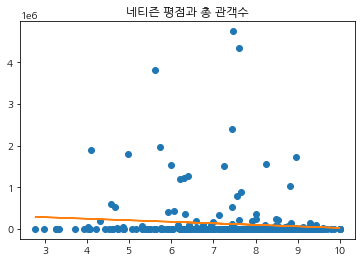

In [25]:
plt.plot(x, y, 'o')
plt.title("네티즌 평점과 총 관객수")
plt.plot(x,netizenViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.show()